In [1]:
# --- Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
sns.set(style="whitegrid")

# --- Load Dataset ---
# Path from notebook to the dataset:
df = pd.read_excel("../additional_material/worldbank_group1.xlsx")

# Preview
df.head()


,country,region,income_group,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
0,Afghanistan,"Middle East, North Africa, Afghanistan & Pakistan",Low income,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN
1,Afghanistan,"Middle East, North Africa, Afghanistan & Pakistan",Low income,1961-01-01,57.878356,NaN,652230.0,327.0,NaN,NaN,...,NaN,NaN,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN
2,Afghanistan,"Middle East, North Africa, Afghanistan & Pakistan",Low income,1962-01-01,57.955016,NaN,652230.0,327.0,NaN,NaN,...,NaN,NaN,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN
3,Afghanistan,"Middle East, North Africa, Afghanistan & Pakistan",Low income,1963-01-01,58.031676,NaN,652230.0,327.0,NaN,NaN,...,NaN,NaN,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN
4,Afghanistan,"Middle East, North Africa, Afghanistan & Pakistan",Low income,1964-01-01,58.116002,NaN,652230.0,327.0,NaN,NaN,...,NaN,NaN,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN


In [2]:
df.describe()

,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,electric_power_consumption,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
count,11603.000000,6564.000000,1.181900e+04,9938.000000,6959.000000,4711.000000,4711.000000,6025.000000,6495.000000,5771.000000,...,433.000000,2077.000000,12875.000000,12857.000000,12704.000000,1.345200e+04,1.332600e+04,4778.000000,4778.000000,3906.000000
mean,36.918102,32.534672,5.997133e+05,1206.377138,24.025264,-0.013057,0.204301,81.484621,30.250057,3227.134069,...,26.855810,37.751565,27.856666,10.332366,64.755195,2.455672e+07,1.328865e+07,-0.003928,0.167624,7.891840
std,22.538148,24.985620,1.648200e+06,812.400412,25.640148,1.002079,0.087927,29.290131,30.511173,4474.350553,...,10.706123,8.853044,13.092576,5.531059,11.277347,1.049265e+08,6.896200e+07,0.995416,0.064446,12.081701
min,0.262821,0.000000,2.027000e+00,18.100000,0.621025,-1.936706,0.114062,0.533899,0.000000,5.548906,...,2.370000,20.700000,5.000000,0.795000,11.995000,2.646000e+03,0.000000e+00,-2.313395,0.102437,0.000000
25%,17.133761,10.896664,1.001000e+04,589.000000,9.801673,-0.788285,0.148400,71.515312,3.200000,423.526029,...,18.500000,31.200000,15.900000,6.782000,57.693000,4.527332e+05,1.702970e+05,-0.804993,0.126759,1.275797
50%,37.949692,30.564435,9.680000e+04,1083.000000,16.310532,-0.231746,0.172851,99.298012,18.730000,1620.387420,...,24.800000,35.600000,26.300000,9.000000,67.571500,4.082205e+06,1.674933e+06,0.043545,0.142527,3.119286
75%,54.930736,51.845053,4.528600e+05,1738.000000,28.138331,0.688829,0.227055,100.000000,52.825000,4401.123687,...,32.600000,43.000000,39.642500,12.241787,73.051415,1.267987e+07,6.971399e+06,0.902022,0.197283,9.165553
max,93.440750,98.574551,1.638995e+07,3240.000000,327.166162,2.459118,0.942502,100.000000,98.340000,54799.174708,...,74.200000,65.800000,58.121000,103.534000,85.497561,1.417173e+09,9.093848e+08,1.800992,0.578548,138.773986


In [3]:
df.shape

(13727, 52)

## Look at the variables for health and well being

In [4]:
# List of variables for the analysis
vars_health = [
    "government_health_expenditure%",
    "life_expectancy_at_birth",
    "birth_rate",
    "death_rate",
    "intentional_homicides",
    "human_capital_index",
    "government_expenditure_on_education%"
]

# Inspect the data
df[vars_health].describe()


,government_health_expenditure%,life_expectancy_at_birth,birth_rate,death_rate,intentional_homicides,human_capital_index,government_expenditure_on_education%
count,3867.000000,12704.000000,12875.000000,12857.000000,3906.000000,590.000000,4862.000000
mean,3.293354,64.755195,27.856666,10.332366,7.891840,0.568721,4.353138
std,2.340685,11.277347,13.092576,5.531059,12.081701,0.145404,1.962049
min,0.062211,11.995000,5.000000,0.795000,0.000000,0.286075,0.000000
25%,1.536648,57.693000,15.900000,6.782000,1.275797,0.443805,3.033689
50%,2.689868,67.571500,26.300000,9.000000,3.119286,0.571865,4.201924
75%,4.560446,73.051415,39.642500,12.241787,9.165553,0.689906,5.382903
max,22.254263,85.497561,58.121000,103.534000,138.773986,0.887084,44.333981


In [5]:


# Step 1: Convert date to datetime & extract year
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["year"] = df["date"].dt.year

# Step 2: Relevant variables
vars_health = [
    "government_health_expenditure%",
    "life_expectancy_at_birth",
    "birth_rate",
    "death_rate",
    "intentional_homicides",
    "human_capital_index",
    "government_expenditure_on_education%"
]

# Step 3: Filter years of interest
years = [2018, 2019, 2020, 2021, 2022, 2023]
df_recent = df[df["year"].isin(years)]

# Step 4: Calculate % missing per variable for each year
missing_by_year = (
    df_recent.groupby("year")[vars_health]
    .apply(lambda x: x.isna().mean() * 100)
)

# Step 5: Display table
missing_by_year


,government_health_expenditure%,life_expectancy_at_birth,birth_rate,death_rate,intentional_homicides,human_capital_index,government_expenditure_on_education%
year,,,,,,,
2018,14.418605,4.186047,1.395349,1.395349,40.465116,23.720930,25.116279
2019,14.883721,4.186047,1.395349,1.395349,37.674419,100.000000,26.511628
2020,14.883721,4.186047,1.860465,1.860465,41.860465,20.465116,26.511628
2021,95.327103,3.738318,1.869159,1.869159,51.869159,100.000000,31.775701
2022,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,59.813084
2023,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [6]:
# Liste of variables
vars_health = [
    "government_health_expenditure%",
    "life_expectancy_at_birth",
    "birth_rate",
    "death_rate",
    "intentional_homicides",
    "human_capital_index",
    "government_expenditure_on_education%"
]

# 2018
mask_2018 = df["date"].dt.year == 2018

count_values_2018 = df.loc[mask_2018, vars_health].notna().sum()

# create table
count_values_2018_df = count_values_2018.reset_index()
count_values_2018_df.columns = ["variable", "count_non_missing"]

count_values_2018_df


,variable,count_non_missing
0,government_health_expenditure%,184
1,life_expectancy_at_birth,206
2,birth_rate,212
3,death_rate,212
4,intentional_homicides,128
5,human_capital_index,164
6,government_expenditure_on_education%,161


In [7]:
# Relevant variables
vars_health = [
    "government_health_expenditure%",
    "life_expectancy_at_birth",
    "birth_rate",
    "death_rate",
    "intentional_homicides",
    "human_capital_index",
    "government_expenditure_on_education%"
]

# Filter only 2018 (without creating a new column)
mask_2018 = df["date"].dt.year


In [8]:

df["date"] = pd.to_datetime(df["date"], errors="coerce")


mask_2018 = df["date"].dt.year == 2018


print("Rows in 2018:", mask_2018.sum())




Rows in 2018: 215


government_health_expenditure% values in 2018 used in histogram: 184
life_expectancy_at_birth values in 2018 used in histogram: 206
birth_rate values in 2018 used in histogram: 212
death_rate values in 2018 used in histogram: 212
intentional_homicides values in 2018 used in histogram: 128
human_capital_index values in 2018 used in histogram: 164
government_expenditure_on_education% values in 2018 used in histogram: 161


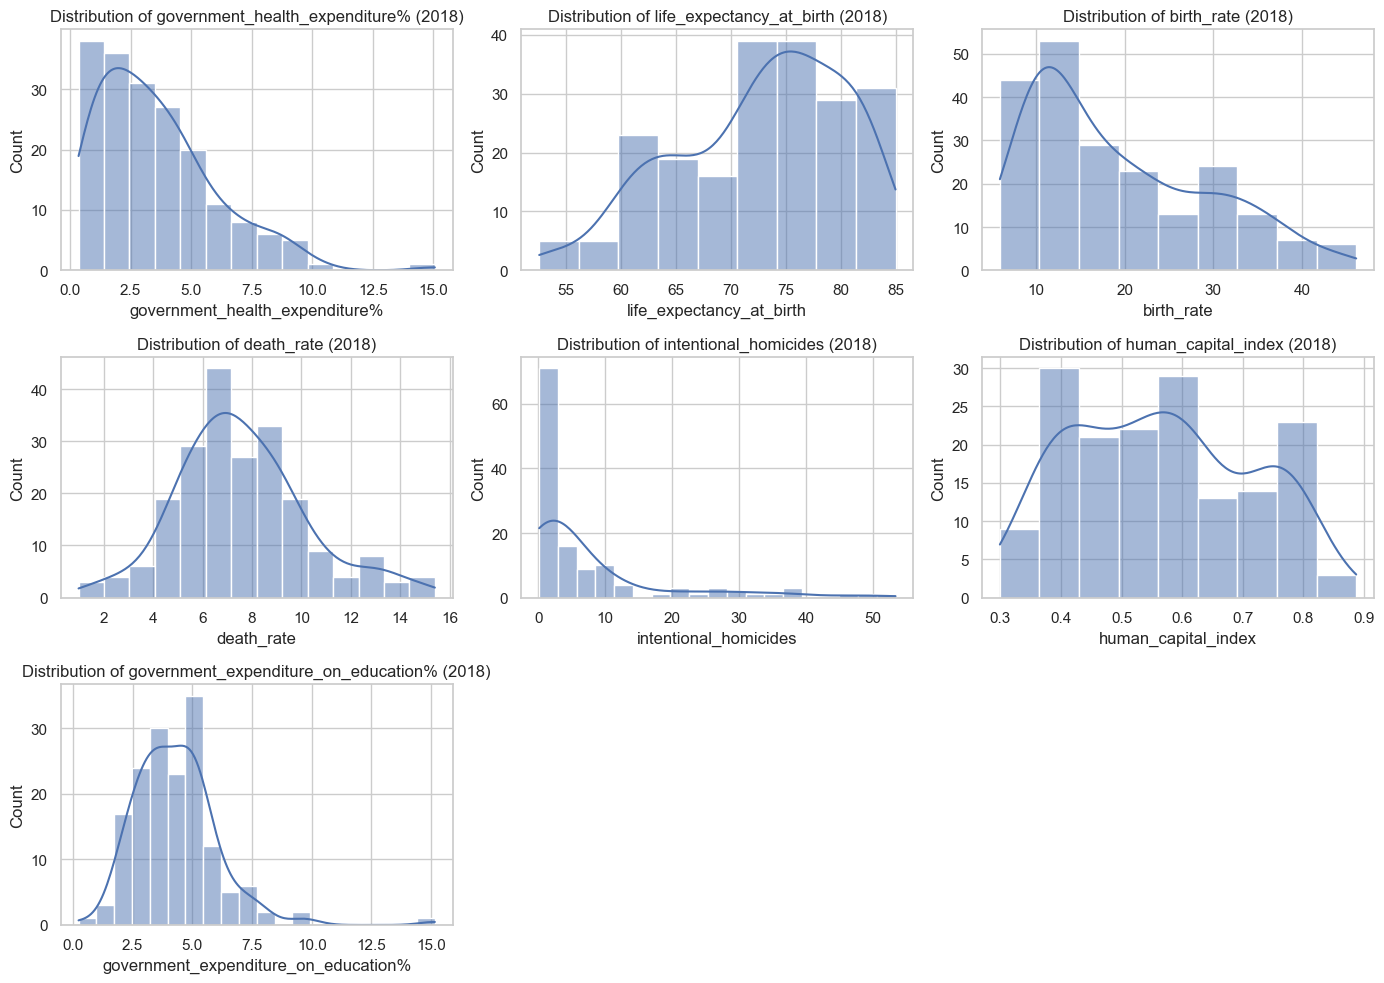

In [9]:


plt.figure(figsize=(14, 10))

for i, col in enumerate(vars_health, 1):
    plt.subplot(3, 3, i)

    data_2018 = df.loc[mask_2018, col].dropna()
    print(col, "values in 2018 used in histogram:", len(data_2018))

    sns.histplot(data_2018, kde=True)
    plt.title(f"Distribution of {col} (2018)")

plt.tight_layout()
plt.show()


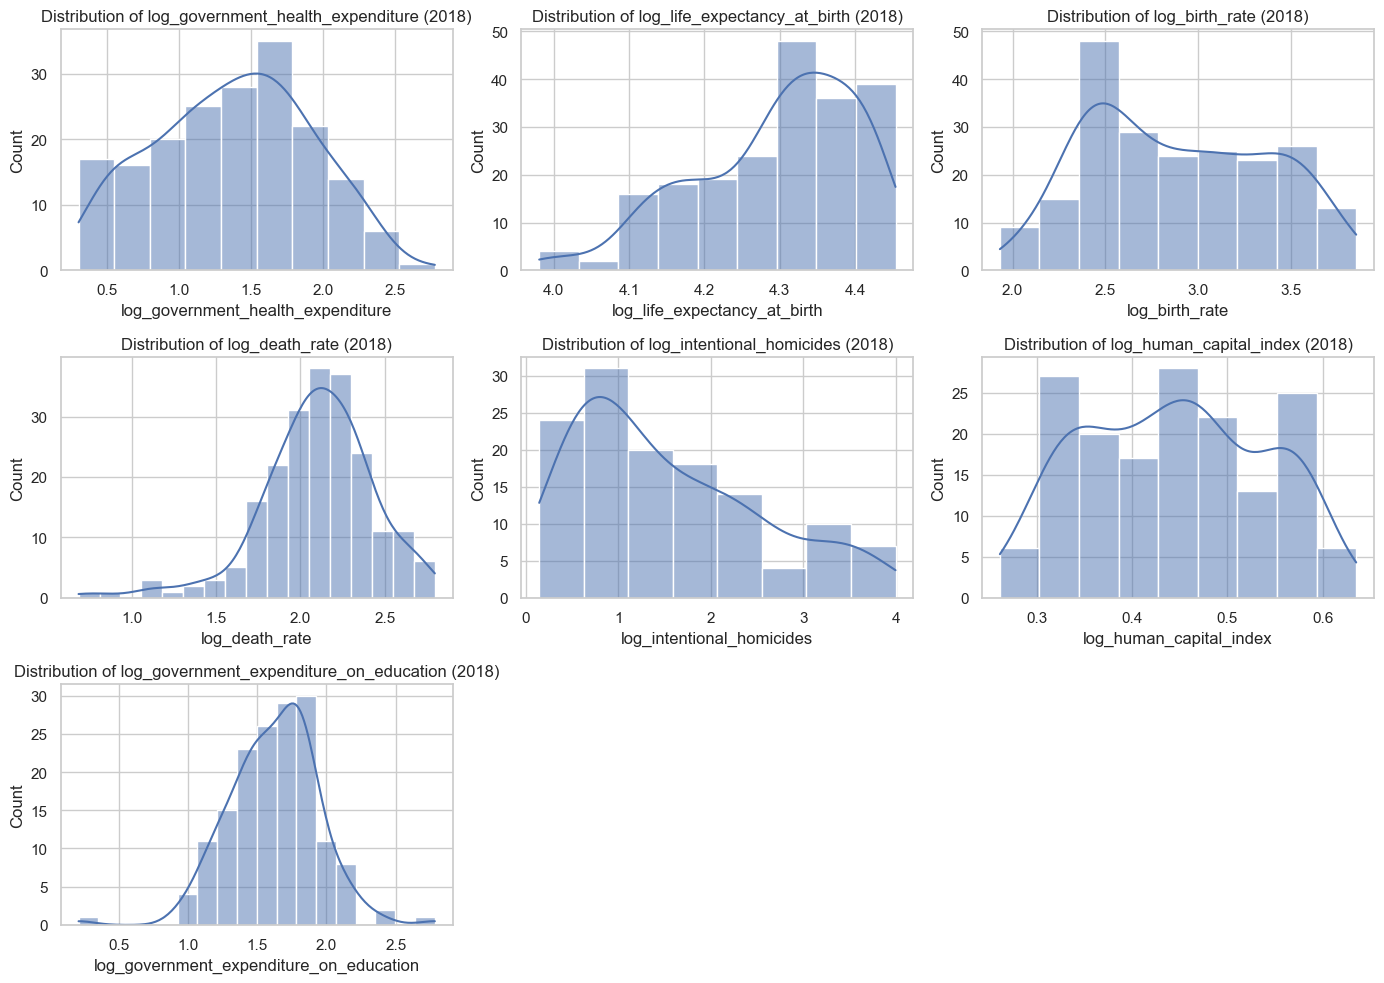

In [10]:
# Create log-transformed variables (log(x + 1))
for var in vars_health:
    # Create a clean new column name
    log_col = "log_" + var.replace("%", "").replace(" ", "").replace("-", "_")
    
    # Apply log(1 + x) to avoid issues with zeros
    df[log_col] = np.log1p(df[var])
    

# Plot histograms for the log-transformed variables for 2018 only
plt.figure(figsize=(14, 10))

mask_2018 = df["date"].dt.year == 2018

# Loop through all variables and plot their log-transformed versions
for i, var in enumerate(vars_health, 1):
    log_col = "log_" + var.replace("%", "").replace(" ", "").replace("-", "_")

    plt.subplot(3, 3, i)
    sns.histplot(df.loc[mask_2018, log_col], kde=True)
    plt.title(f"Distribution of {log_col} (2018)")

plt.tight_layout()
plt.show()


## 3. Visualization

In [11]:
vars_health_log = [
    "log_government_health_expenditure",
    "log_life_expectancy_at_birth",
    "log_birth_rate",
    "log_death_rate",
    "log_intentional_homicides",
    "log_human_capital_index",
    "log_government_expenditure_on_education"
]


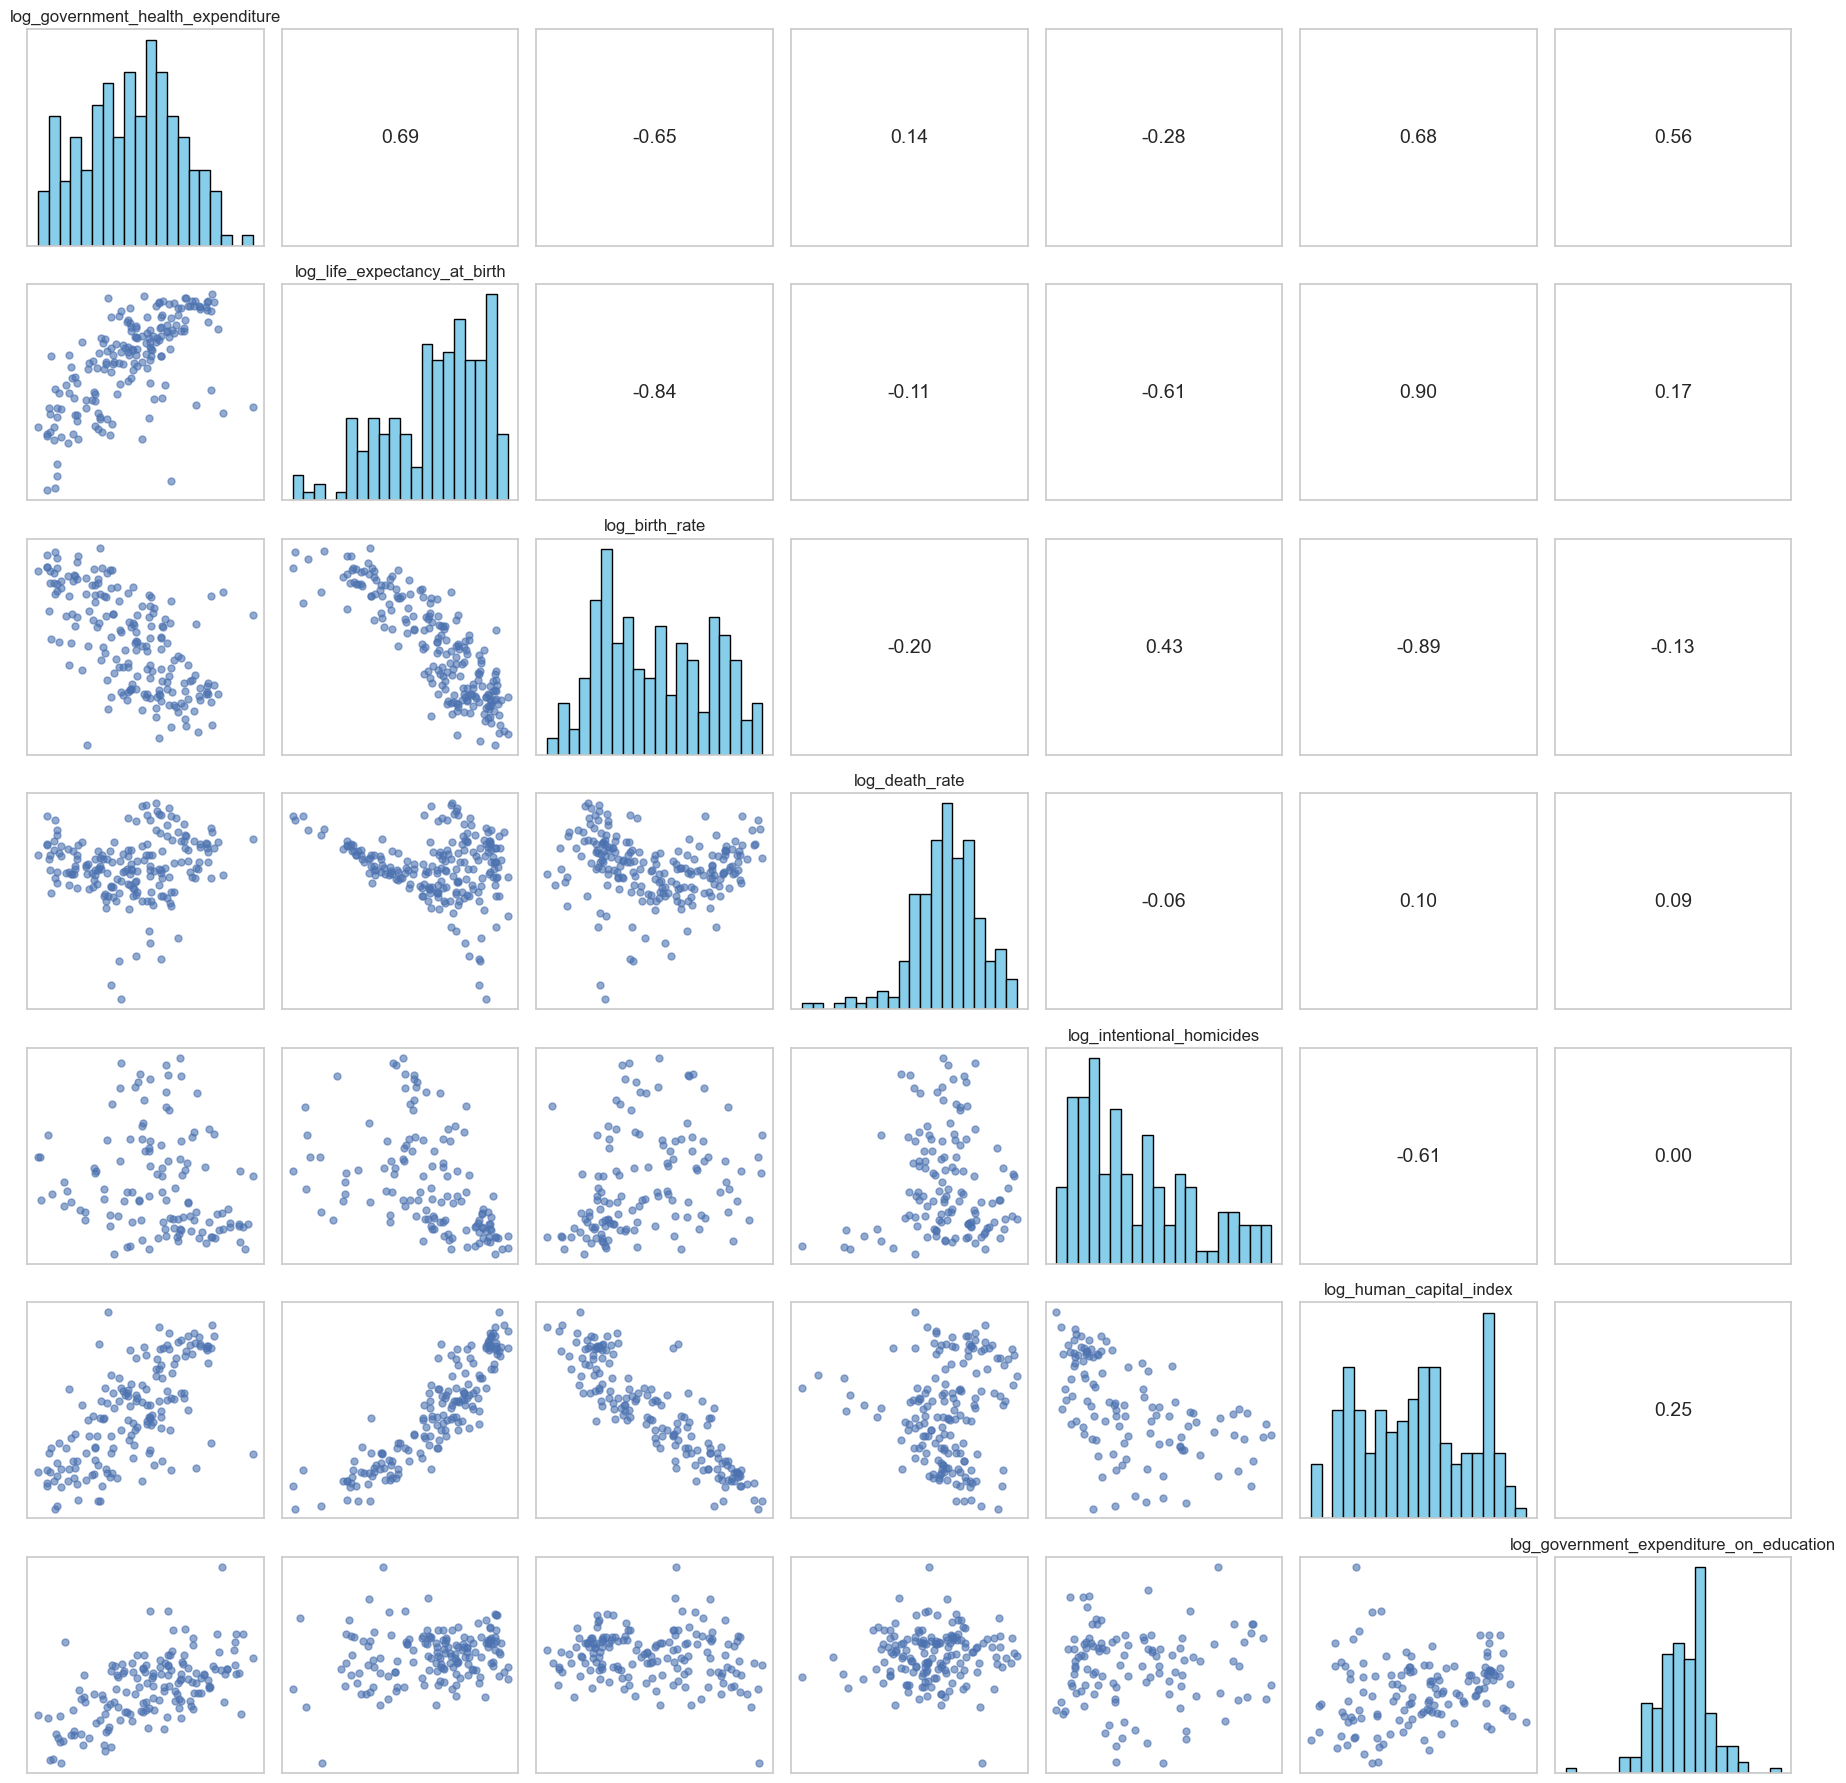

In [12]:


# Filter only 2018 data
mask_2018 = df["date"].dt.year == 2018
data_2018 = df.loc[mask_2018, vars_health_log]

# Number of variables
k = len(vars_health_log)

# Create the figure
fig, axes = plt.subplots(k, k, figsize=(18, 18))

# Loop through rows and columns
for i in range(k):
    for j in range(k):

        ax = axes[i, j]

        # Diagonal: histogram
        if i == j:
            # Histogram for variable i
            ax.hist(data_2018[vars_health_log[i]].dropna(), bins=20, color="skyblue", edgecolor="black")
            ax.set_title(vars_health_log[i])
        
        # Lower triangle: scatterplots
        elif i > j:
            # Scatterplot for variable pair (j, i)
            ax.scatter(
                data_2018[vars_health_log[j]],
                data_2018[vars_health_log[i]],
                alpha=0.6,
                s=25
            )
        
        # Upper triangle: Spearman correlation values
        else:
            # Compute Spearman correlation
            corr = data_2018[[vars_health_log[i], vars_health_log[j]]].corr(method="spearman").iloc[0, 1]
            ax.text(
                0.5, 0.5,
                f"{corr:.2f}",
                fontsize=14,
                ha="center",
                va="center"
            )
        
        # Remove ticks for cleaner look
        ax.set_xticks([])
        ax.set_yticks([])

# Adjust layout
plt.tight_layout()
plt.show()


## 4. Statistical Testing

In [13]:
from scipy.stats import spearmanr  # new function, same library as before

# Filter only 2018 data
mask_2018 = df["date"].dt.year == 2018
data_2018 = df.loc[mask_2018, vars_health_log]

# 1) Spearman correlation matrix (2018, log variables)
spearman_corr_matrix_2018 = data_2018.corr(method="spearman")
spearman_corr_matrix_2018


,log_government_health_expenditure,log_life_expectancy_at_birth,log_birth_rate,log_death_rate,log_intentional_homicides,log_human_capital_index,log_government_expenditure_on_education
log_government_health_expenditure,1.000000,0.693178,-0.646636,0.135895,-0.279811,0.677859,0.563658
log_life_expectancy_at_birth,0.693178,1.000000,-0.842780,-0.106705,-0.606519,0.901194,0.174982
log_birth_rate,-0.646636,-0.842780,1.000000,-0.200163,0.427435,-0.890359,-0.128201
log_death_rate,0.135895,-0.106705,-0.200163,1.000000,-0.059766,0.101715,0.085305
log_intentional_homicides,-0.279811,-0.606519,0.427435,-0.059766,1.000000,-0.609929,0.000176
log_human_capital_index,0.677859,0.901194,-0.890359,0.101715,-0.609929,1.000000,0.249406
log_government_expenditure_on_education,0.563658,0.174982,-0.128201,0.085305,0.000176,0.249406,1.000000


In [14]:
# Filter 2018 data
mask_2018 = df["date"].dt.year == 2018
data_2018 = df.loc[mask_2018, vars_health_log]

# Create empty tables
corr_table = pd.DataFrame(index=vars_health_log, columns=vars_health_log)
pval_table = pd.DataFrame(index=vars_health_log, columns=vars_health_log)

# Fill lower triangle with Spearman rho and p-values
for i, var1 in enumerate(vars_health_log):
    for j, var2 in enumerate(vars_health_log):
        
        if i > j:
            # Use only non-missing pairs
            subset = data_2018[[var1, var2]].dropna()
            
            rho, p = spearmanr(subset[var1], subset[var2])
            
            # Round correlation to 3 decimals
            corr_table.loc[var1, var2] = f"{rho:.3f}"
            
            # Format p-value as 0.xxx, with very small values as 0.000
            if p < 0.0005:
                p_formatted = "0.000"
            else:
                p_formatted = f"{p:.3f}"
            pval_table.loc[var1, var2] = p_formatted
        
        elif i == j:
            # Optional: show 1.000 on the diagonal of the correlation table
            corr_table.loc[var1, var2] = "1.000"
            pval_table.loc[var1, var2] = ""
        
        else:
            # Leave upper triangle empty
            corr_table.loc[var1, var2] = ""
            pval_table.loc[var1, var2] = ""
from IPython.display import display  # new import is fine, was not used before

print("Spearman correlation (rho)")
display(corr_table)

print("Spearman p-values")
display(pval_table)



Spearman correlation (rho)


,log_government_health_expenditure,log_life_expectancy_at_birth,log_birth_rate,log_death_rate,log_intentional_homicides,log_human_capital_index,log_government_expenditure_on_education
log_government_health_expenditure,1.000,,,,,,
log_life_expectancy_at_birth,0.693,1.000,,,,,
log_birth_rate,-0.647,-0.843,1.000,,,,
log_death_rate,0.136,-0.107,-0.200,1.000,,,
log_intentional_homicides,-0.280,-0.607,0.427,-0.060,1.000,,
log_human_capital_index,0.678,0.901,-0.890,0.102,-0.610,1.000,
log_government_expenditure_on_education,0.564,0.175,-0.128,0.085,0.000,0.249,1.000


Spearman p-values


,log_government_health_expenditure,log_life_expectancy_at_birth,log_birth_rate,log_death_rate,log_intentional_homicides,log_human_capital_index,log_government_expenditure_on_education
log_government_health_expenditure,,,,,,,
log_life_expectancy_at_birth,0.000,,,,,,
log_birth_rate,0.000,0.000,,,,,
log_death_rate,0.066,0.127,0.003,,,,
log_intentional_homicides,0.002,0.000,0.000,0.504,,,
log_human_capital_index,0.000,0.000,0.000,0.196,0.000,,
log_government_expenditure_on_education,0.000,0.028,0.105,0.282,0.999,0.003,


## Analyse the correlation between birth rate and gdp per capita

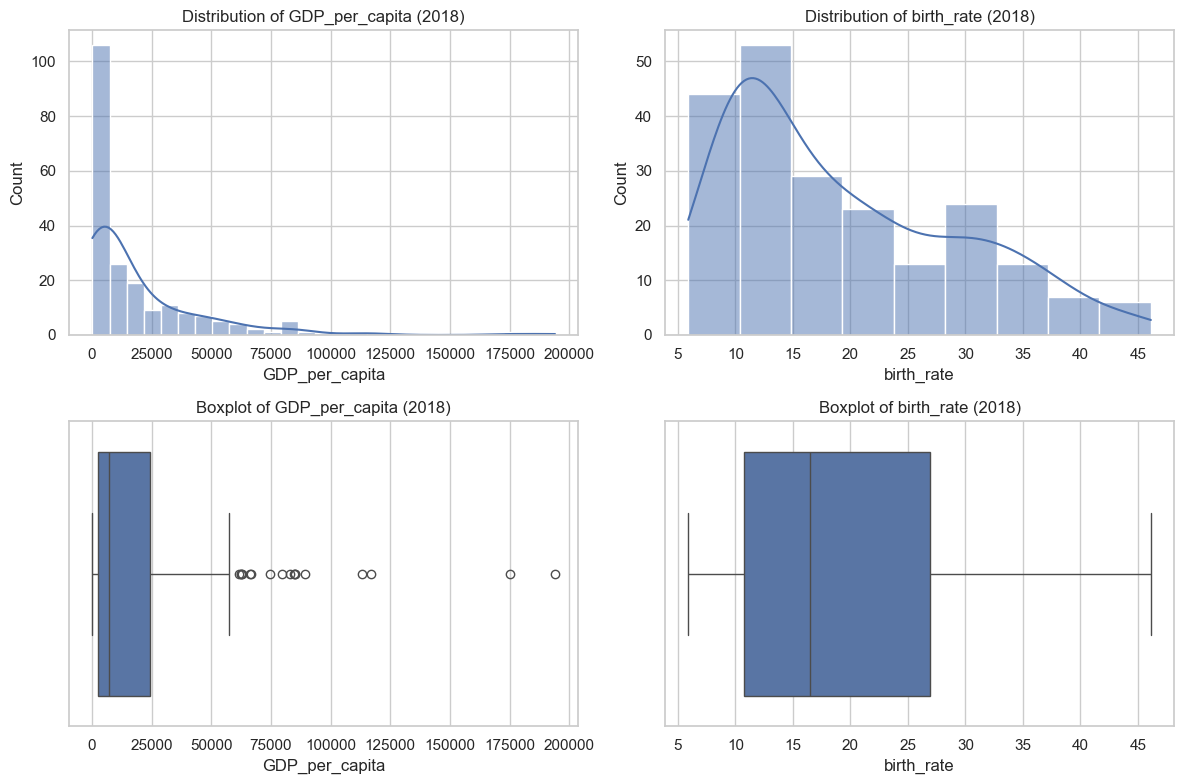

In [15]:
# 1) Create GDP per capita variable
#    Assumes GDP_current_US is total GDP in current US dollars
#    and population is the total population of the country.
df["GDP_per_capita"] = df["GDP_current_US"] / df["population"]

# 2) Data inspection for 2018: histograms and boxplots
#    We focus only on the year 2018 to be consistent with the rest of the analysis.
mask_2018 = df["date"].dt.year == 2018
data_2018 = df.loc[mask_2018, ["GDP_per_capita", "birth_rate"]]

plt.figure(figsize=(12, 8))

# Histogram of GDP_per_capita
plt.subplot(2, 2, 1)
sns.histplot(data_2018["GDP_per_capita"].dropna(), kde=True)
plt.title("Distribution of GDP_per_capita (2018)")
plt.xlabel("GDP_per_capita")
plt.ylabel("Count")

# Histogram of birth_rate
plt.subplot(2, 2, 2)
sns.histplot(data_2018["birth_rate"].dropna(), kde=True)
plt.title("Distribution of birth_rate (2018)")
plt.xlabel("birth_rate")
plt.ylabel("Count")

# Boxplot of GDP_per_capita
plt.subplot(2, 2, 3)
sns.boxplot(x=data_2018["GDP_per_capita"].dropna())
plt.title("Boxplot of GDP_per_capita (2018)")
plt.xlabel("GDP_per_capita")

# Boxplot of birth_rate
plt.subplot(2, 2, 4)
sns.boxplot(x=data_2018["birth_rate"].dropna())
plt.title("Boxplot of birth_rate (2018)")
plt.xlabel("birth_rate")

plt.tight_layout()
plt.show()


In [16]:
# Create log-transformed variables for GDP_per_capita and birth_rate
# Using log(1 + x) to avoid issues with zeros or very small values

df["log_GDP_per_capita"] = np.log1p(df["GDP_per_capita"])
df["log_birth_rate"] = np.log1p(df["birth_rate"])


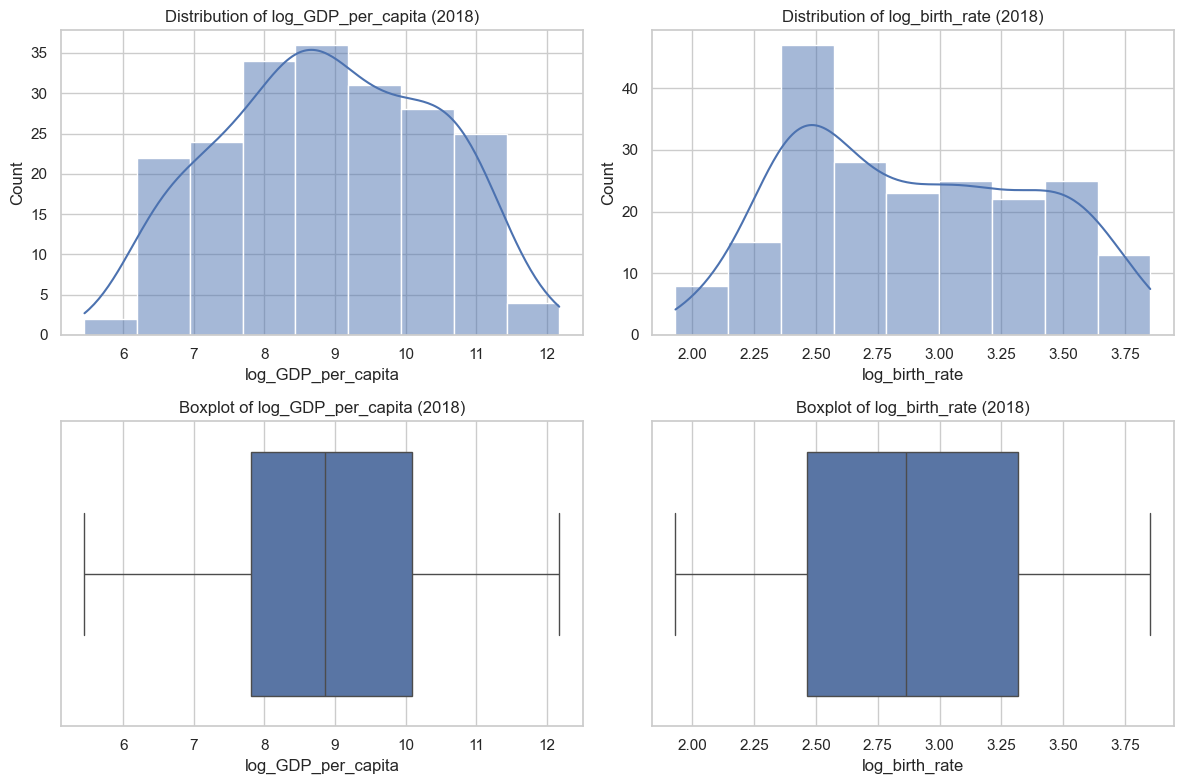

In [17]:
# Filter data for 2018
mask_2018 = df["date"].dt.year == 2018
data_2018 = df.loc[mask_2018, ["log_GDP_per_capita", "log_birth_rate"]].dropna()

plt.figure(figsize=(12, 8))

# Histogram: log_GDP_per_capita
plt.subplot(2, 2, 1)
sns.histplot(data_2018["log_GDP_per_capita"], kde=True)
plt.title("Distribution of log_GDP_per_capita (2018)")
plt.xlabel("log_GDP_per_capita")
plt.ylabel("Count")

# Histogram: log_birth_rate
plt.subplot(2, 2, 2)
sns.histplot(data_2018["log_birth_rate"], kde=True)
plt.title("Distribution of log_birth_rate (2018)")
plt.xlabel("log_birth_rate")
plt.ylabel("Count")

# Boxplot: log_GDP_per_capita
plt.subplot(2, 2, 3)
sns.boxplot(x=data_2018["log_GDP_per_capita"])
plt.title("Boxplot of log_GDP_per_capita (2018)")
plt.xlabel("log_GDP_per_capita")

# Boxplot: log_birth_rate
plt.subplot(2, 2, 4)
sns.boxplot(x=data_2018["log_birth_rate"])
plt.title("Boxplot of log_birth_rate (2018)")
plt.xlabel("log_birth_rate")

plt.tight_layout()
plt.show()


### Visualization

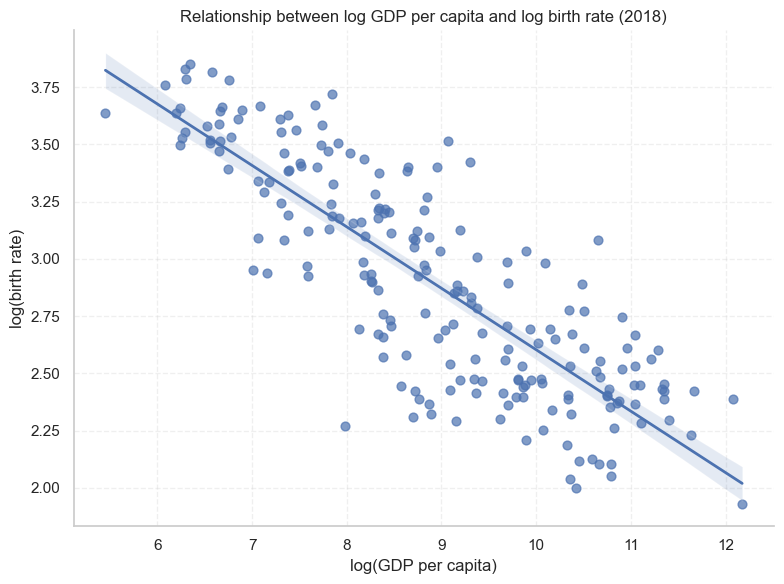

In [18]:
# Filter data for 2018
mask_2018 = df["date"].dt.year == 2018

# Select non-missing data for both variables
plot_data = df.loc[mask_2018, ["log_GDP_per_capita", "log_birth_rate"]].dropna()

plt.figure(figsize=(8, 6))

# Create scatterplot with regression line
sns.regplot(
    data=plot_data,
    x="log_GDP_per_capita",
    y="log_birth_rate",
    scatter_kws={"alpha": 0.7, "s": 40},
    line_kws={"linewidth": 2}
)

# Make the plot look nice
plt.title("Relationship between log GDP per capita and log birth rate (2018)")
plt.xlabel("log(GDP per capita)")
plt.ylabel("log(birth rate)")
plt.grid(True, linestyle="--", alpha=0.3)

# Remove top and right spines for a cleaner look
sns.despine()

plt.tight_layout()
plt.show()


### Statistical tests

In [19]:
# Step 4: Statistical test for the relationship between log_GDP_per_capita and log_birth_rate

# 1) Filter data for 2018 and drop missing values
mask_2018 = df["date"].dt.year == 2018
subset = df.loc[mask_2018, ["log_GDP_per_capita", "log_birth_rate"]].dropna()

n = len(subset)  # sample size

# 2) Spearman correlation (non-parametric, robust to non-normality and outliers)
rho_s, p_s = spearmanr(subset["log_GDP_per_capita"], subset["log_birth_rate"])


# 4) Print results in a readable way
print(f"Sample size (n): {n}")
print(f"Spearman correlation (rho): {rho_s:.3f}, p-value: {p_s:.3f}")



Sample size (n): 206
Spearman correlation (rho): -0.819, p-value: 0.000


# New stuff: Tobias

In [20]:
# create per Capita data where required for correlaions

# Ensure date and year
df['year'] = pd.to_datetime(df['date']).dt.year

# Create per-capita columns (population exists)
df['electric_power_consumption_pc'] = df['electric_power_consumption'] / df['population']
df['CO2_emisions_pc'] = df['CO2_emisions'] / df['population']
df['GDP_current_US_pc'] = df['GDP_current_US'] / df['population']

# Show first rows of new columns
df[['country','year','population',
    'electric_power_consumption_pc',
    'CO2_emisions_pc',
    'GDP_current_US_pc']].head()

,country,year,population,electric_power_consumption_pc,CO2_emisions_pc,GDP_current_US_pc
0,Afghanistan,1960,8622466.0,NaN,NaN,62.369375
1,Afghanistan,1961,8790140.0,NaN,NaN,62.443703
2,Afghanistan,1962,8969047.0,NaN,NaN,60.950364
3,Afghanistan,1963,9157465.0,NaN,NaN,82.021738
4,Afghanistan,1964,9355514.0,NaN,NaN,85.511073


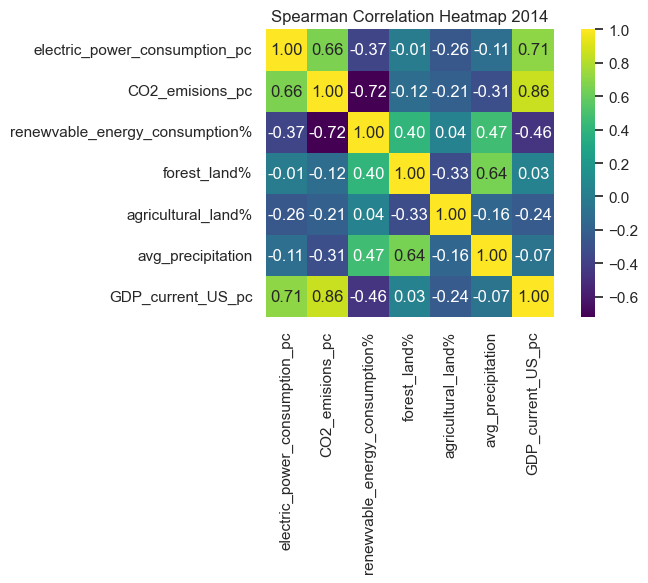

In [21]:
# Select relevant environmental indicators
vars_env = [
    'electric_power_consumption_pc',
    'CO2_emisions_pc',
    'renewvable_energy_consumption%',
    'forest_land%',
    'agricultural_land%',
    'avg_precipitation',
    'GDP_current_US_pc'
]

# Filter for best year
df_year = df[df['year'] == 2014][vars_env].dropna()

# Compute Spearman correlation
corr = df_year.corr(method='spearman')

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    square=True
)

plt.title("Spearman Correlation Heatmap 2014")
plt.tight_layout()
plt.show()

In [22]:
import pingouin as pg

In [23]:
# Check normality

norm_gdp = pg.normality(df['GDP_current_US_pc'].dropna())
norm_elec = pg.normality(df['electric_power_consumption_pc'].dropna())

print("\n=== Normality Test (Shapiro–Wilk) ===")

print("\nGDP_current_US_pc:")
print(norm_gdp.to_string(index=False))

print("\nelectric_power_consumption_pc:")
print(norm_elec.to_string(index=False))



=== Normality Test (Shapiro–Wilk) ===

GDP_current_US_pc:
      W         pval  normal
0.53389 9.292821e-97   False

electric_power_consumption_pc:
       W         pval  normal
0.211639 4.659374e-94   False


c:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10334.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5771.
  res = hypotest_fun_out(*samples, **kwds)


In [24]:
# Skewness and Kurtosis


print("\n=== Skewness ===")
print("GDP_current_US_pc:", df['GDP_current_US_pc'].dropna().skew())
print("electric_power_consumption_pc:", df['electric_power_consumption_pc'].dropna().skew())

print("\n=== Kurtosis ===")
print("GDP_current_US_pc:", df['GDP_current_US_pc'].dropna().kurtosis())
print("electric_power_consumption_pc:", df['electric_power_consumption_pc'].dropna().kurtosis())



=== Skewness ===
GDP_current_US_pc: 4.270553310555071
electric_power_consumption_pc: 8.185371182442692

=== Kurtosis ===
GDP_current_US_pc: 27.087369323334094
electric_power_consumption_pc: 78.6079650166889


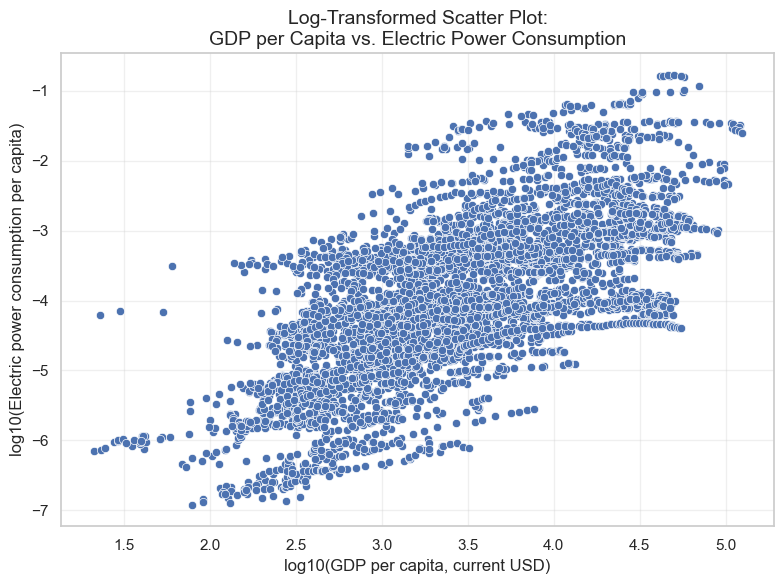

In [25]:
# Data is heavily skewed and not normally distributed. I'll log transform both variables for plotting the scatterplot



plt.figure(figsize=(8,6))

sns.scatterplot(
    x=np.log10(df['GDP_current_US_pc']),
    y=np.log10(df['electric_power_consumption_pc'])
)

plt.xlabel("log10(GDP per capita, current USD)", fontsize=12)
plt.ylabel("log10(Electric power consumption per capita)", fontsize=12)
plt.title("Log-Transformed Scatter Plot:\nGDP per Capita vs. Electric Power Consumption", fontsize=14)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [26]:
corr = pg.corr(df['GDP_current_US_pc'],
                df['electric_power_consumption_pc'],
                   method='spearman')

print("\nCorrelation Result (Spearman):\n")
print(corr)


Correlation Result (Spearman):

             n         r        CI95%  p-val  power
spearman  5211  0.687979  [0.67, 0.7]    0.0    1.0


The scatter plot suggests a **general upward trend**: countries with higher electric
power consumption per capita tend to have higher GDP per capita. The correlation
coefficient quantifies this relationship. A positive and statistically significant
correlation indicates a strong direction: as electricity consumption increases, GDP
per capita tends to increase as well.

However, **correlation does NOT imply causation.** This analysis does not tell us whether
electricity consumption causes higher GDP, whether GDP growth increases energy use,
or whether both are influenced by other structural factors (e.g., industrialization,
infrastructure, climate, policy, or geography).

# ranjit stuff

In [27]:
selected_columns = [
    'GDP_current_US',
    'inflation_annual%',
    'multidimensional_poverty_headcount_ratio%',
    'gini_index',
    'tax_revenue%',
    'real_interest_rate',
    'central_goverment_debt%',
    'expense%',
    'human_capital_index',
    'government_health_expenditure%',
    'government_expenditure_on_education%',
    'life_expectancy_at_birth'
]
df_correlation = df[selected_columns]
correlation_matrix = df_correlation.corr()

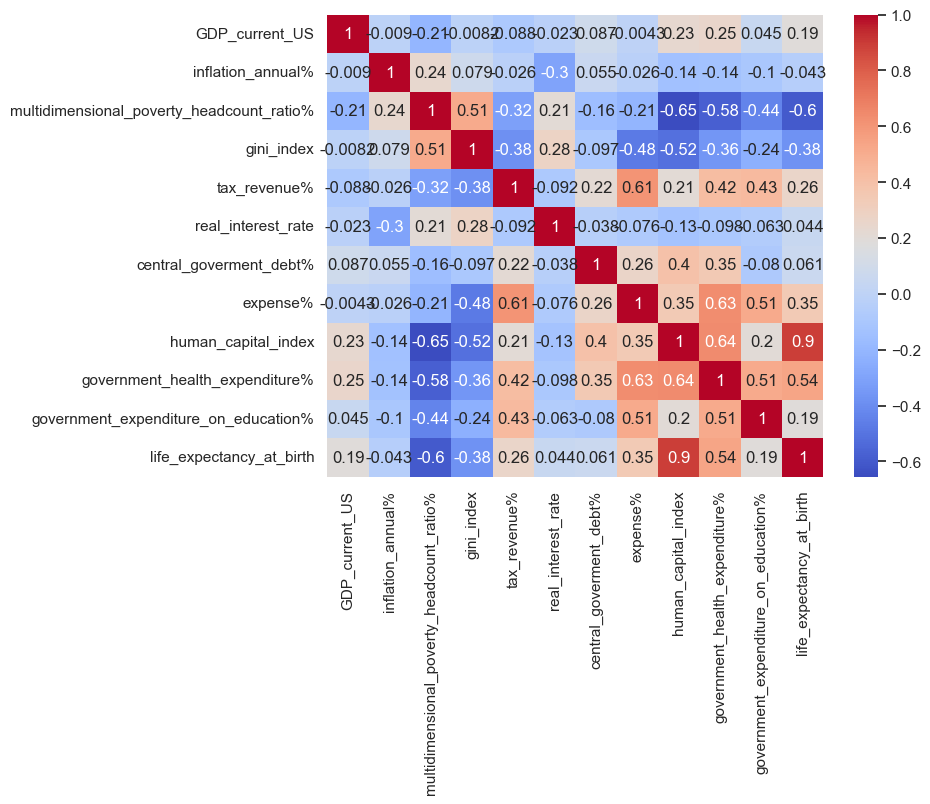

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

## Reaserch Question 1: How strongly is a country’s human capital level associated with its poverty rate (multidimensional poverty headcount ratio)?

Text(0.5, 1.0, 'Human Capital vs Poverty')

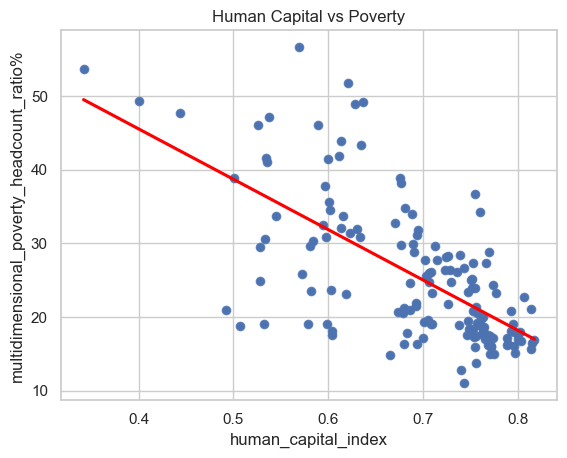

In [29]:
sns.scatterplot(data=df, x="human_capital_index", y="multidimensional_poverty_headcount_ratio%")
sns.regplot(data=df, x="human_capital_index", y="multidimensional_poverty_headcount_ratio%", ci=None, line_kws={"color": "red"})
plt.title(f'Human Capital vs Poverty')

##### This is  Negative corraltion(Spearman r ≈ -0.64)which tells as the human capital index increases, the poverty headcount decreases. It means  the Countries with higher education, skills, and health levels (high human capital) , tend to have much lower poverty rates.

Text(0.5, 1.0, 'distribution of multidimensional_poverty_headcount_ratio')

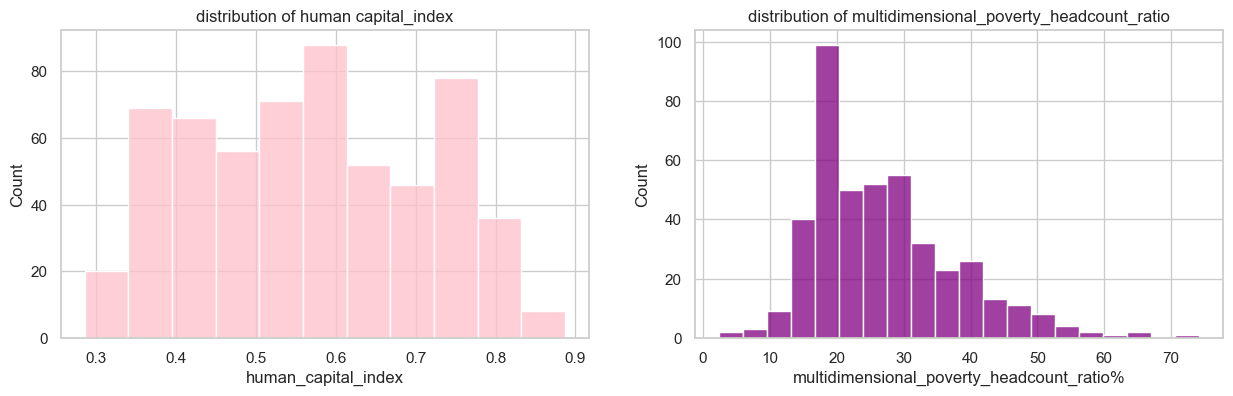

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
colors = ["pink", "purple"]

# Plot 1
sns.histplot(df["human_capital_index"], color=colors[0], ax=axes[0])
axes[0].set_title("distribution of human capital_index")

# Plot 2 (square root)
sns.histplot(df["multidimensional_poverty_headcount_ratio%"], color=colors[1], ax=axes[1])
axes[1].set_title("distribution of multidimensional_poverty_headcount_ratio")

In [31]:
pg.corr(df["human_capital_index"],df["multidimensional_poverty_headcount_ratio%"], method="spearman")

,n,r,CI95%,p-val,power
spearman,148,-0.643364,"[-0.73, -0.54]",1.168146e-18,1.0


In [32]:
df["human_capital_index_log"] = np.log(df["human_capital_index"]+1)
df["multidimensional_poverty_headcount_ratio%_log"] = np.log(df["multidimensional_poverty_headcount_ratio%"]+1)

Text(0.5, 1.0, 'Human Capital vs Poverty (log transformed)')

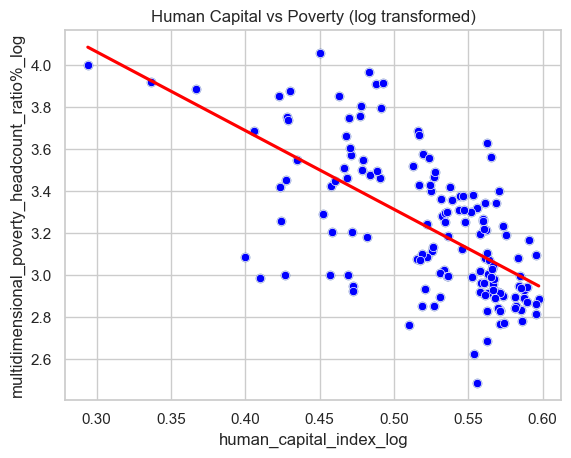

In [33]:
sns.regplot(data=df, x="human_capital_index_log", y="multidimensional_poverty_headcount_ratio%_log", ci=None, line_kws={"color": "red"})
sns.scatterplot(data=df, x="human_capital_index_log", y="multidimensional_poverty_headcount_ratio%_log", color="blue")
plt.title(f'Human Capital vs Poverty (log transformed)')

In [34]:
#without outliers and log transform
pg.corr(df["human_capital_index_log"],df["multidimensional_poverty_headcount_ratio%_log"], method="spearman")

,n,r,CI95%,p-val,power
spearman,148,-0.643364,"[-0.73, -0.54]",1.168146e-18,1.0


##  Reaserch Question 2 'Human Capital vs Life Expectancy at Birth

Text(0.5, 1.0, 'Human Capital vs Life Expectancy at Birth')

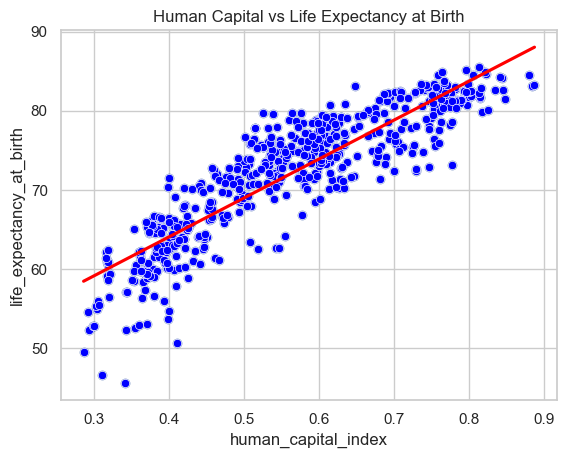

In [35]:
sns.regplot(data=df, x="human_capital_index", y="life_expectancy_at_birth", ci=None, line_kws={"color": "red"})
sns.scatterplot(data=df, x="human_capital_index", y="life_expectancy_at_birth", color="blue")

plt.title(f'Human Capital vs Life Expectancy at Birth')

In [36]:
pg.corr(df["human_capital_index"],df["life_expectancy_at_birth"], method="spearman")

,n,r,CI95%,p-val,power
spearman,584,0.906879,"[0.89, 0.92]",1.343033e-220,1.0


##### The results show a very strong positive correlation (Spearman r ≈ 0.90) between Human Capital Index and Life Expectancy. It means countries with higher HCI (health, education, skills) almost always have higher life expectancy.

##  Reaserch Question 3 'tax revenue  vs expenses 

Text(0.5, 1.0, 'Tax revenue vs Expenses by Government')

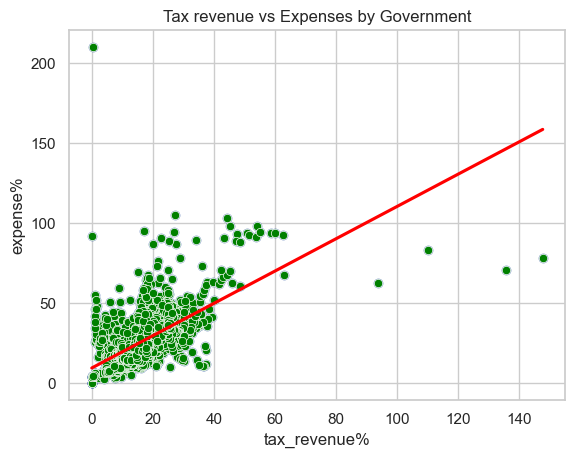

In [37]:
sns.regplot(data=df, x="tax_revenue%", y="expense%", ci=None, line_kws={"color": "red"})
sns.scatterplot(data=df, x="tax_revenue%", y="expense%",color="green")
plt.title(f'Tax revenue vs Expenses by Government')

In [38]:
pg.corr(df["tax_revenue%"],df["expense%"], method="spearman")

,n,r,CI95%,p-val,power
spearman,4014,0.685156,"[0.67, 0.7]",0.0,1.0


##### The results show a moderate positive correlation (Spearman r ≈ 0.68) between Tax Revenue and Government Expenses. It means more tax revenue leads to more government spending.This suggests that countries with higher tax revenue tend to also exhibit higher levels of government spending. The relationship is statistically significant (p < 0.001), and the 95% confidence interval [0.67, 0.70] shows that the correlation is both stable and precise due to the large sample size (n = 4014).

# add shreyas stuff here